# Generates a graph based on the temporal occurence of each feature

### Initialization:

In [122]:
import numpy as np
import tensorflow.compat.v1 as tf
import networkx as nx
import matplotlib.pyplot as plt

tf.disable_v2_behavior()

In [123]:
# File Names
load_pre = '../'
images_file_name = 'Data/frames.npy'
F = np.load(load_pre+'bases.npy')

K,sz = F.shape;
k_sz = np.int32(np.floor(np.sqrt(sz)))


### Construct Graph

In [124]:
alpha = np.load('./../batch_alpha.npy')

N,H,W,K = alpha.shape;

corr = np.zeros((K,K))


for n in range(N-1):
    
    print('# '+str(n)+'/'+str(N))
    
    A0 = alpha[n,6,6].reshape([-1,K]);
    A1 = alpha[n+1,6,6].reshape([-1,K]);

    #A0 = np.sign(A0)
    #A1 = np.sign(A1)
    
    factor1 = np.matmul(A0.transpose(),A1)
    factor2 = np.matmul(A1.transpose(),A0)

    corr += factor1
    corr += factor2


# 0/1024
# 1/1024
# 2/1024
# 3/1024
# 4/1024
# 5/1024
# 6/1024
# 7/1024
# 8/1024
# 9/1024
# 10/1024
# 11/1024
# 12/1024
# 13/1024
# 14/1024
# 15/1024
# 16/1024
# 17/1024
# 18/1024
# 19/1024
# 20/1024
# 21/1024
# 22/1024
# 23/1024
# 24/1024
# 25/1024
# 26/1024
# 27/1024
# 28/1024
# 29/1024
# 30/1024
# 31/1024
# 32/1024
# 33/1024
# 34/1024
# 35/1024
# 36/1024
# 37/1024
# 38/1024
# 39/1024
# 40/1024
# 41/1024
# 42/1024
# 43/1024
# 44/1024
# 45/1024
# 46/1024
# 47/1024
# 48/1024
# 49/1024
# 50/1024
# 51/1024
# 52/1024
# 53/1024
# 54/1024
# 55/1024
# 56/1024
# 57/1024
# 58/1024
# 59/1024
# 60/1024
# 61/1024
# 62/1024
# 63/1024
# 64/1024
# 65/1024
# 66/1024
# 67/1024
# 68/1024
# 69/1024
# 70/1024
# 71/1024
# 72/1024
# 73/1024
# 74/1024
# 75/1024
# 76/1024
# 77/1024
# 78/1024
# 79/1024
# 80/1024
# 81/1024
# 82/1024
# 83/1024
# 84/1024
# 85/1024
# 86/1024
# 87/1024
# 88/1024
# 89/1024
# 90/1024
# 91/1024
# 92/1024
# 93/1024
# 94/1024
# 95/1024
# 96/1024
# 97/1024
# 98/1024
# 99/1024
# 100/1024

# 815/1024
# 816/1024
# 817/1024
# 818/1024
# 819/1024
# 820/1024
# 821/1024
# 822/1024
# 823/1024
# 824/1024
# 825/1024
# 826/1024
# 827/1024
# 828/1024
# 829/1024
# 830/1024
# 831/1024
# 832/1024
# 833/1024
# 834/1024
# 835/1024
# 836/1024
# 837/1024
# 838/1024
# 839/1024
# 840/1024
# 841/1024
# 842/1024
# 843/1024
# 844/1024
# 845/1024
# 846/1024
# 847/1024
# 848/1024
# 849/1024
# 850/1024
# 851/1024
# 852/1024
# 853/1024
# 854/1024
# 855/1024
# 856/1024
# 857/1024
# 858/1024
# 859/1024
# 860/1024
# 861/1024
# 862/1024
# 863/1024
# 864/1024
# 865/1024
# 866/1024
# 867/1024
# 868/1024
# 869/1024
# 870/1024
# 871/1024
# 872/1024
# 873/1024
# 874/1024
# 875/1024
# 876/1024
# 877/1024
# 878/1024
# 879/1024
# 880/1024
# 881/1024
# 882/1024
# 883/1024
# 884/1024
# 885/1024
# 886/1024
# 887/1024
# 888/1024
# 889/1024
# 890/1024
# 891/1024
# 892/1024
# 893/1024
# 894/1024
# 895/1024
# 896/1024
# 897/1024
# 898/1024
# 899/1024
# 900/1024
# 901/1024
# 902/1024
# 903/1024
# 904/1024
# 905/1024

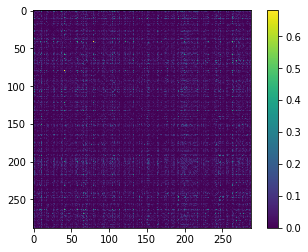

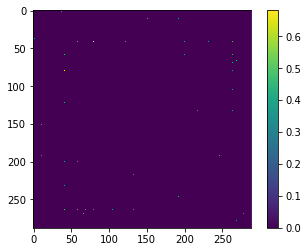

In [125]:

A = corr/np.max(corr);

np.fill_diagonal(A,0.0)

plt.imshow(A)
plt.colorbar()
plt.show()

threshold = 0.35;
active = np.sign(np.maximum(A-threshold,0))

A *= active


plt.imshow(A)
plt.colorbar()
plt.show()

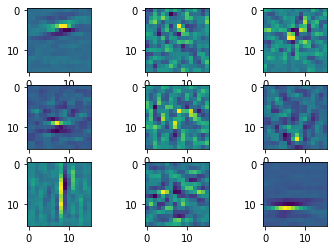

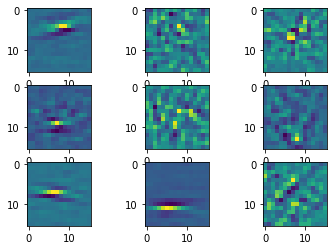

In [ ]:

nn_sqrt = 3;
nn_num = nn_sqrt*nn_sqrt;


for k in range(K):
    edges = A[k];
    
    
    nn = np.argsort(edges)[-nn_num+1:]
    
    plt.subplot(nn_sqrt,nn_sqrt,1)
    plt.imshow(F[k,:].reshape([k_sz,k_sz]))
    
    for i in range(nn_num-1):
        plt.subplot(nn_sqrt,nn_sqrt,i+2)
        plt.imshow(F[nn[i],:].reshape([k_sz,k_sz]))
    plt.show()
    input()
    

In [113]:
G=nx.from_numpy_matrix(A)

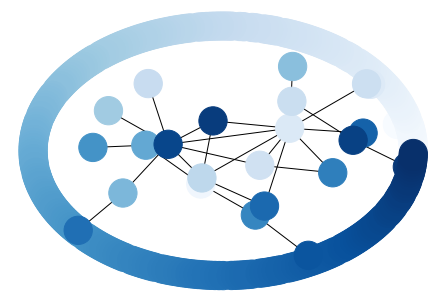

In [114]:
# Draw graph
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, node_color=range(G.number_of_nodes()), node_size=800, cmap=plt.cm.Blues)
plt.show()

In [111]:

components = nx.connected_components(G)

for component in components:
    print(component)
    input()

    

{0}

{1, 132, 263, 9, 11, 140, 268, 15, 273, 17, 274, 276, 277, 278, 151, 152, 281, 283, 28, 27, 30, 32, 164, 37, 165, 38, 41, 169, 42, 174, 177, 178, 179, 57, 58, 63, 192, 64, 66, 65, 196, 197, 69, 70, 200, 77, 79, 208, 82, 217, 220, 93, 95, 224, 227, 230, 231, 105, 107, 241, 114, 242, 246, 247, 122, 251}

{2}

{3}

{4}

{5}

{6}


{7}
{8}


{10}
{12}

{13}


{14}
{16}

{18}


{19}
{20}


{21}

{22}
{23}

{24}

{25}


{26}
{29}


{31}

{33}
{34}

{35}

{36}

{39}


{40}
{43}

{44}

{45}

{46}

{47}


{48}

{49}
{50}

{51}


{52}

{53}
{54}

{55}


{56}
{59}

{60}

{61}


{62}
{67}

{68}

{71}

{72}


{73}
{74}

{75}

{76}

{78}

{80}

{81}

{83}


{84}

{85}
{86}

{87}

{88}

{89}

{90}

{91}


{92}
{94}

{96}


{97}
{98}


{99}
{100}

{101}

{102}

{103}

{104}

{106}

{108}

{109}

{110}


{111}
{112}

{113}

{115}


{116}
{117}

{118}


{119}
{120}

{121}


{123}

{124}
{125}


{126}
{127}

{128}


{129}
{130}

{131}


{133}
{134}

{135}


{136}
{137}

{138}

{139}

{141}


{142}
{

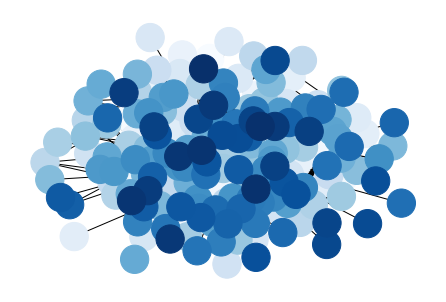

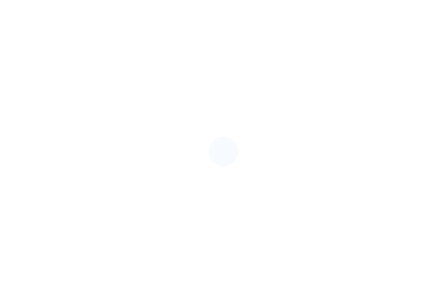

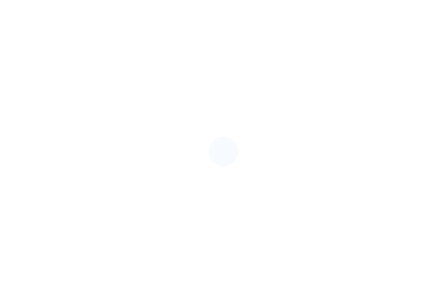

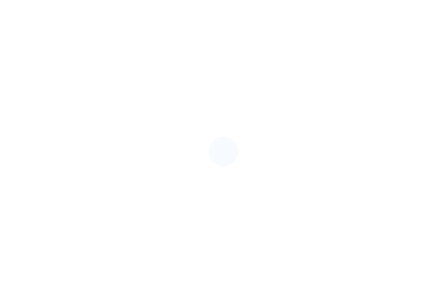

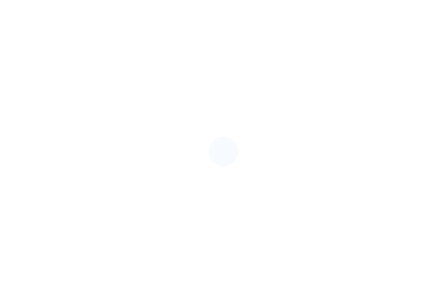

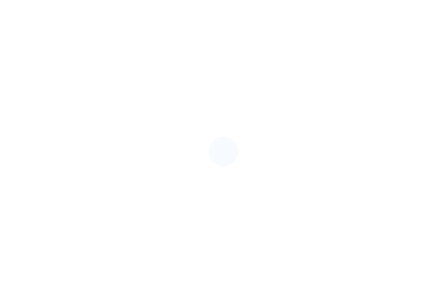

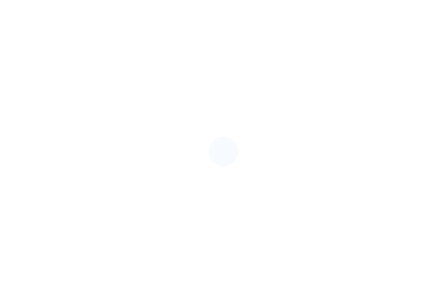

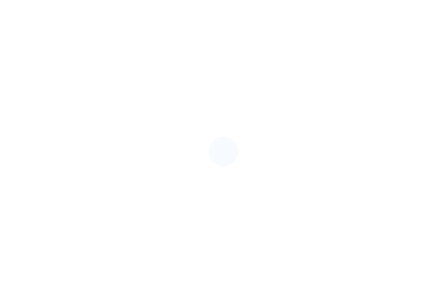

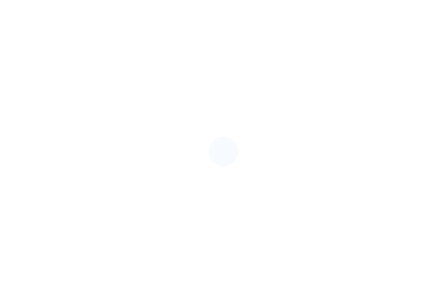

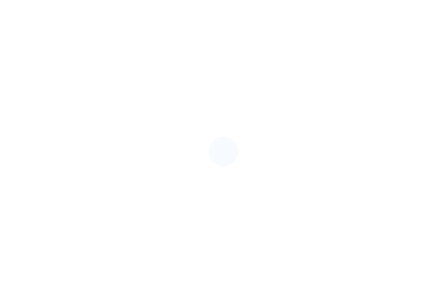

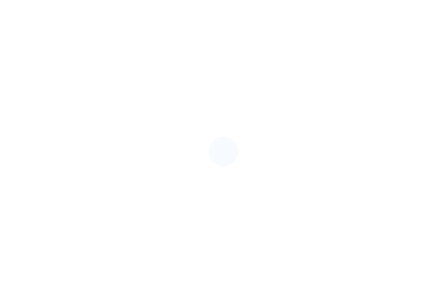

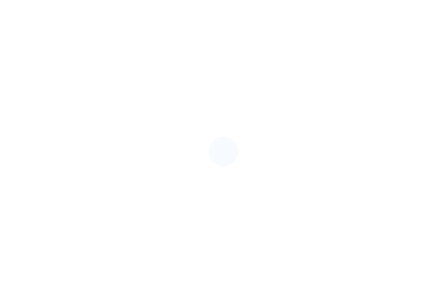

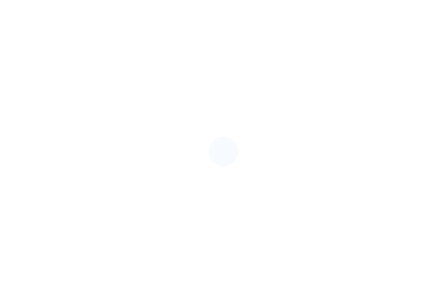

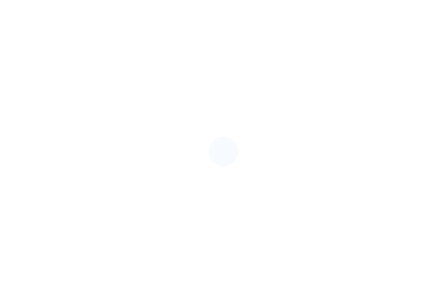

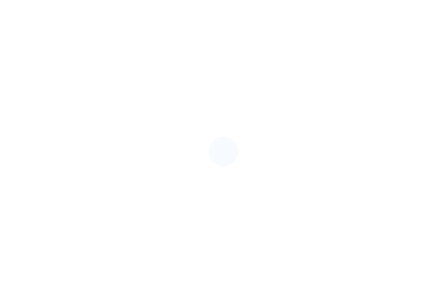

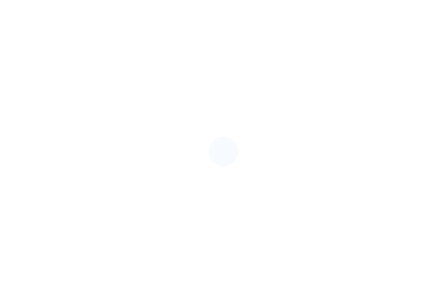

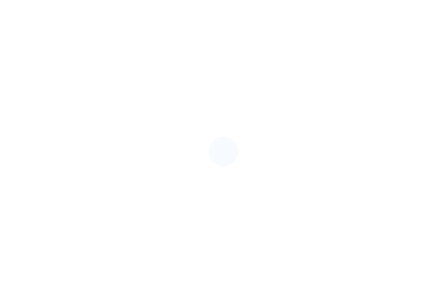

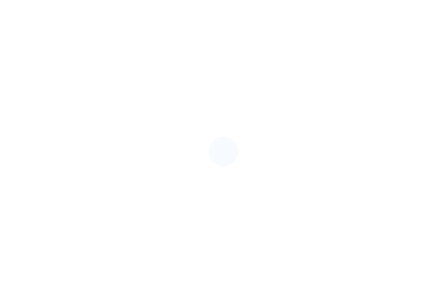

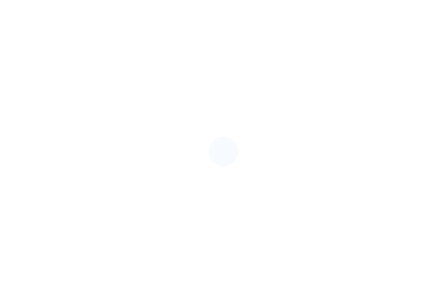

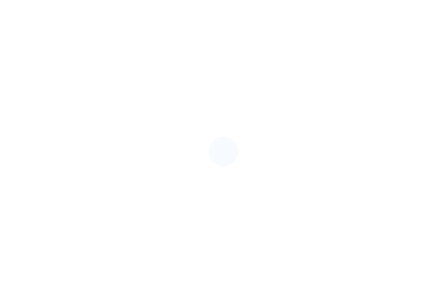

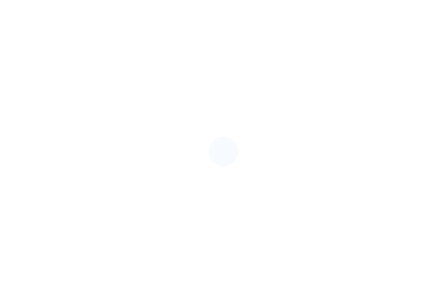

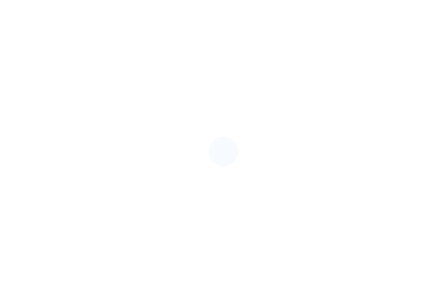

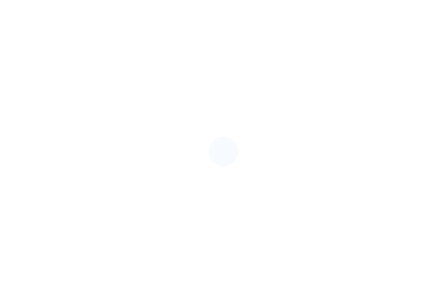

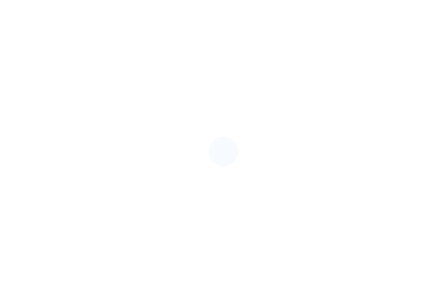

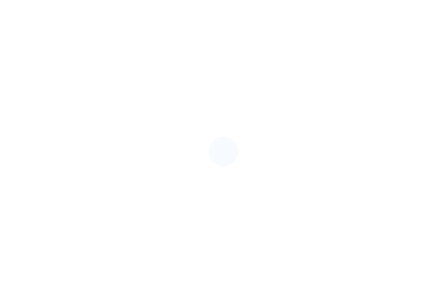

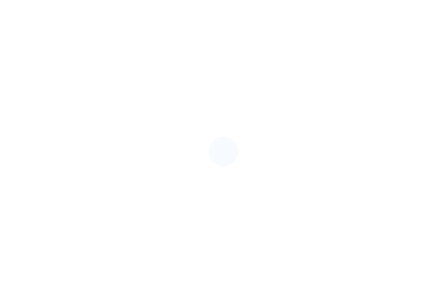

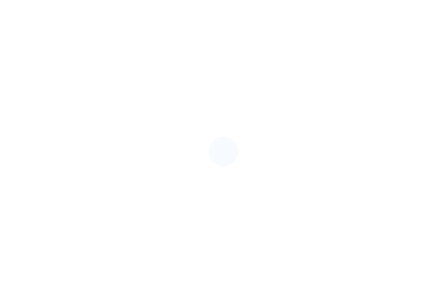

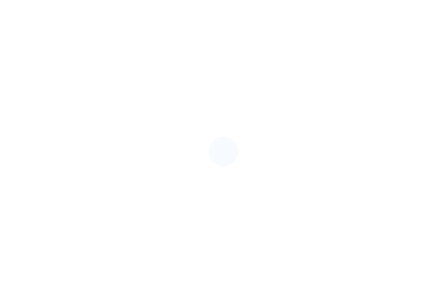

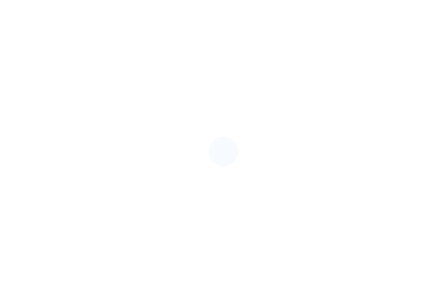

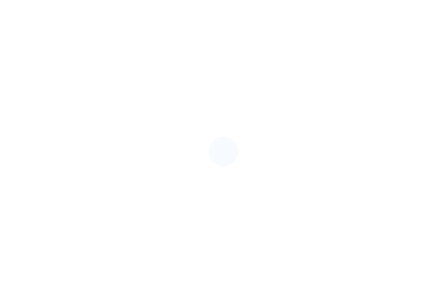

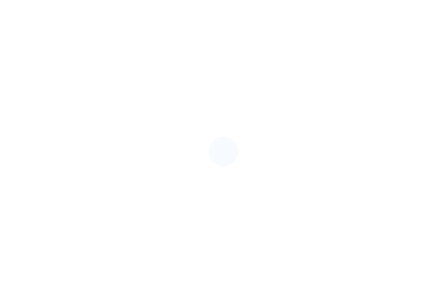

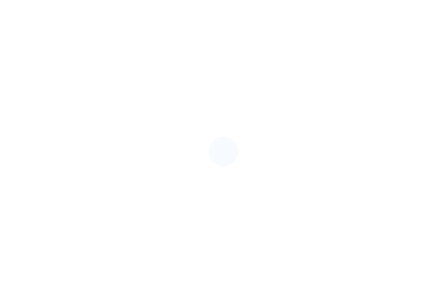

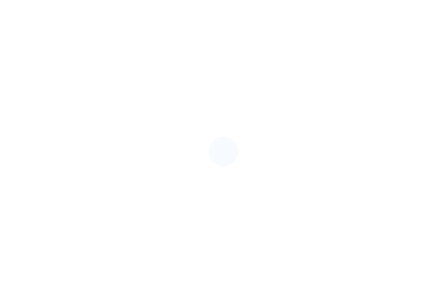

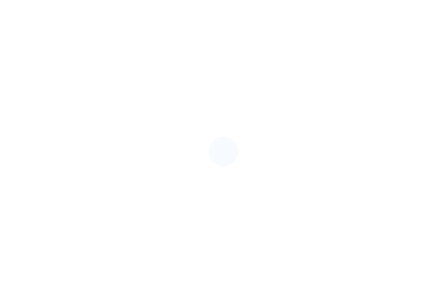

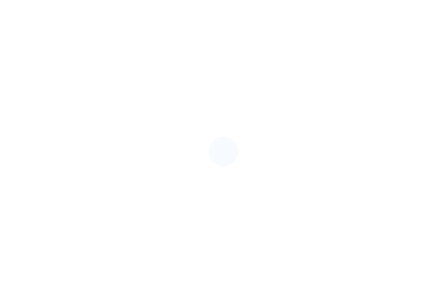

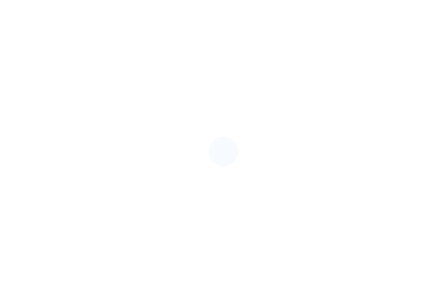

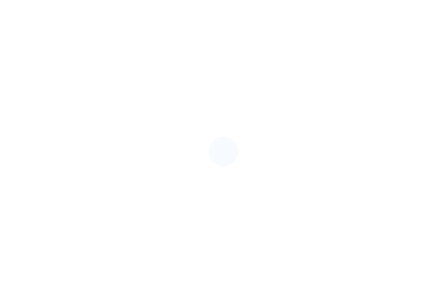

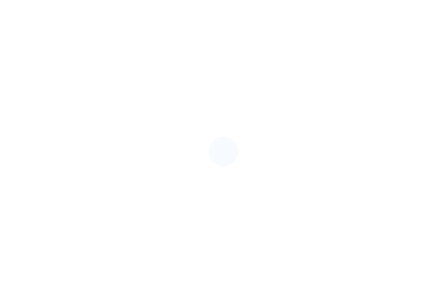

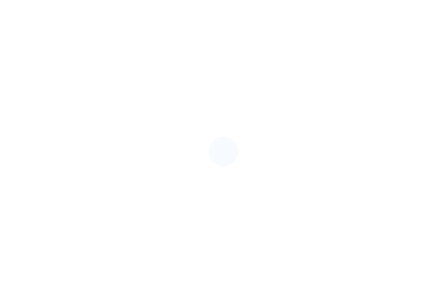

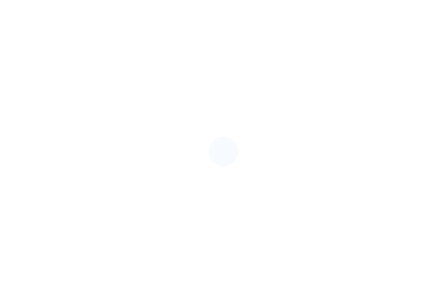

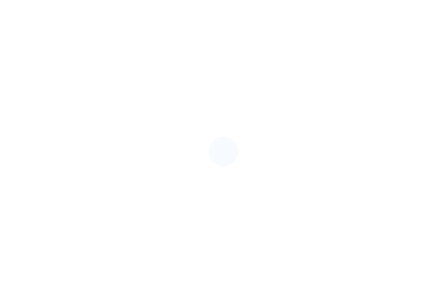

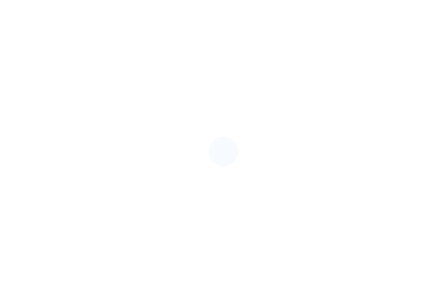

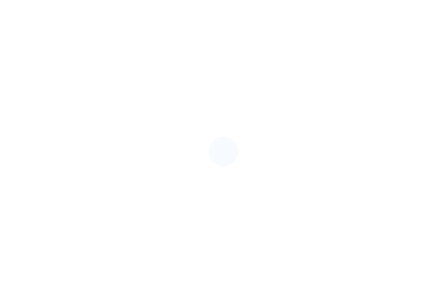

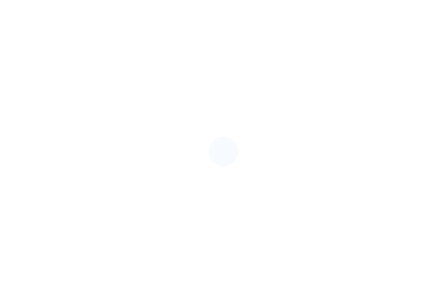

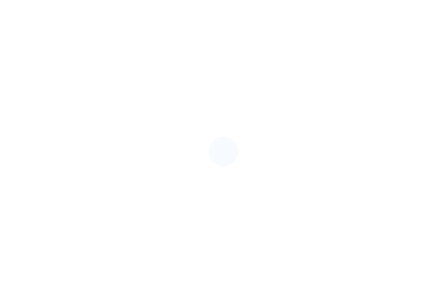

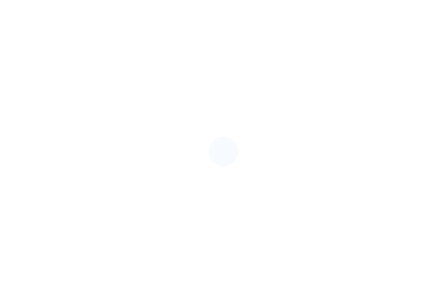

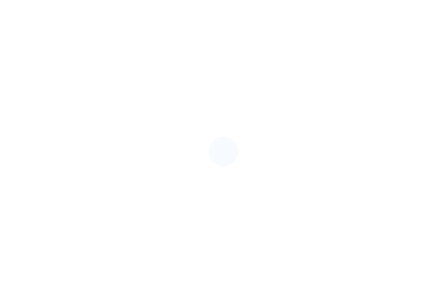

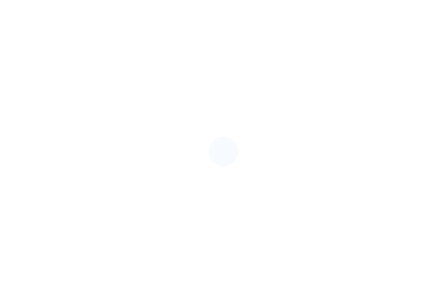

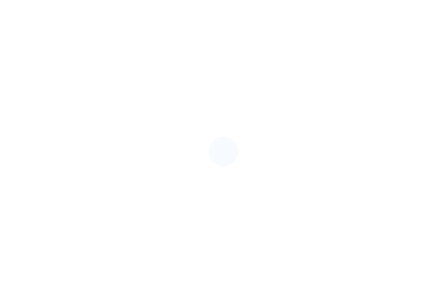

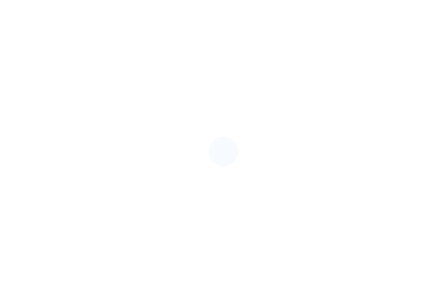

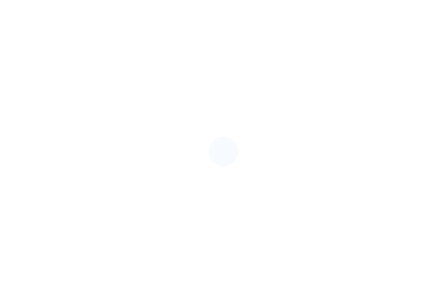

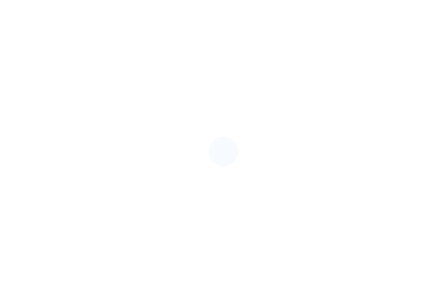

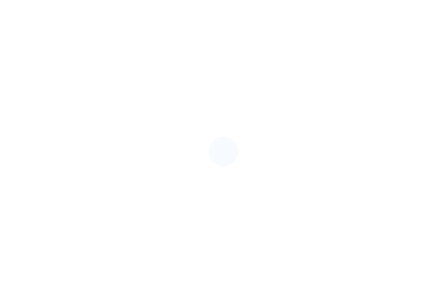

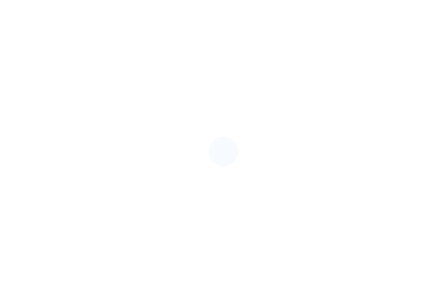

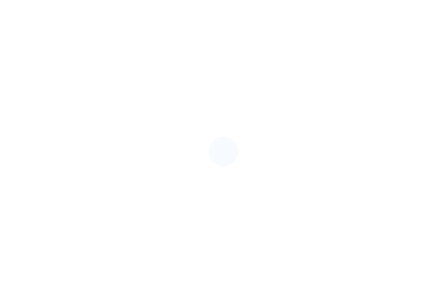

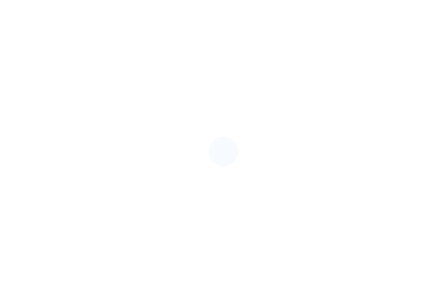

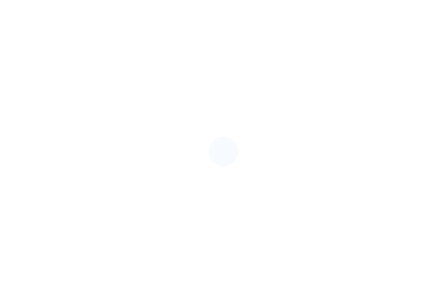

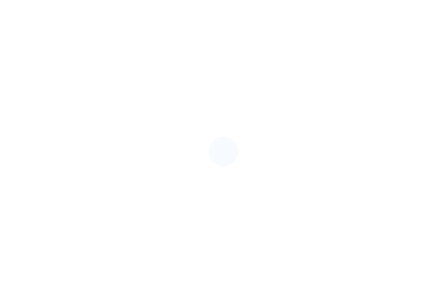

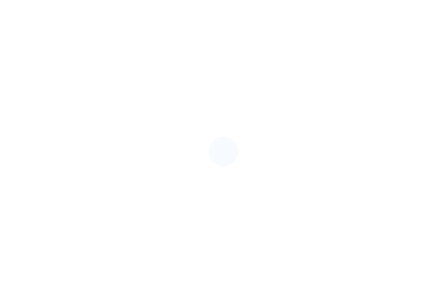

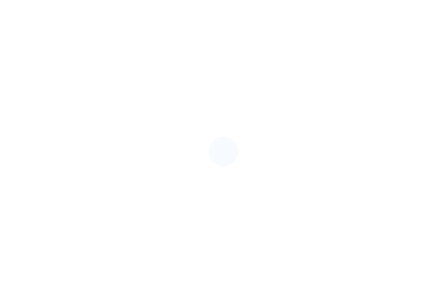

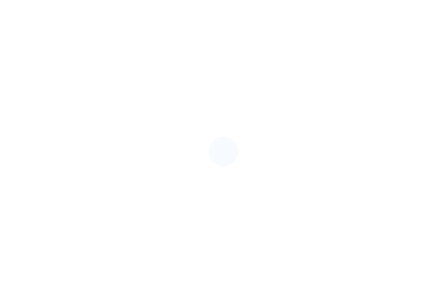

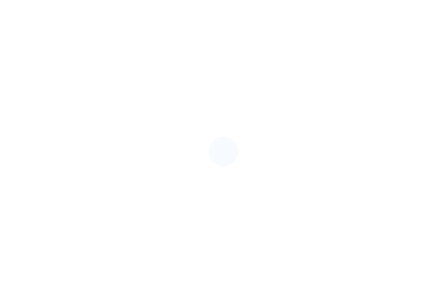

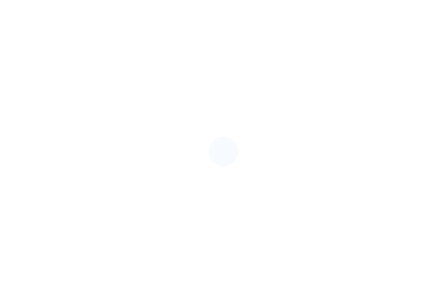

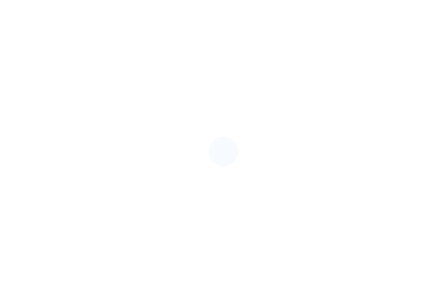

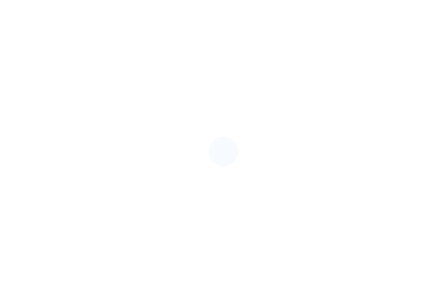

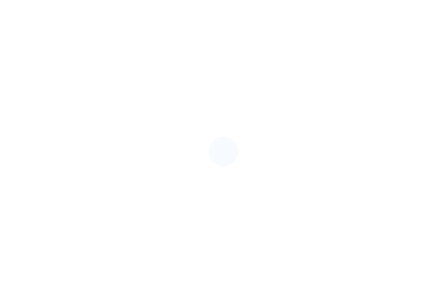

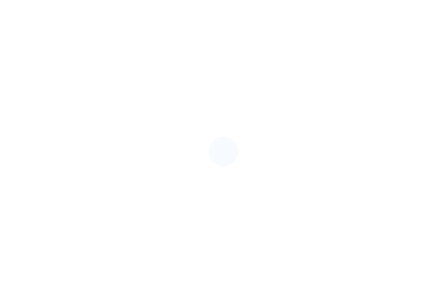

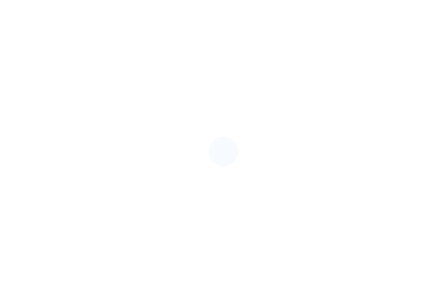

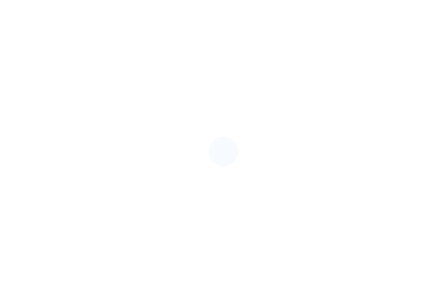

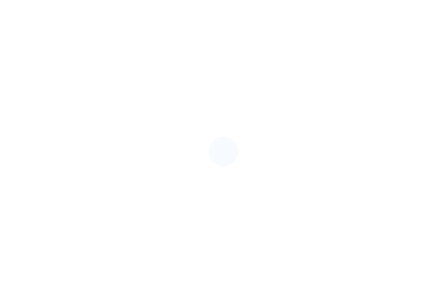

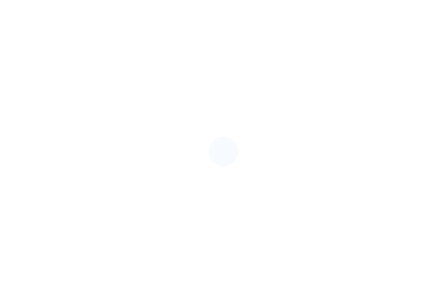

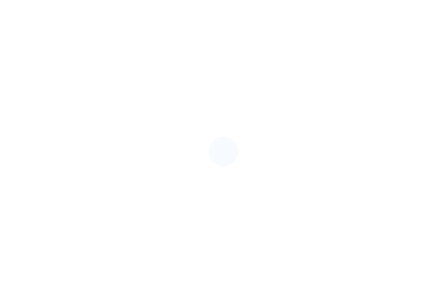

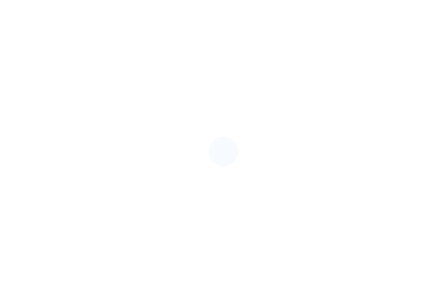

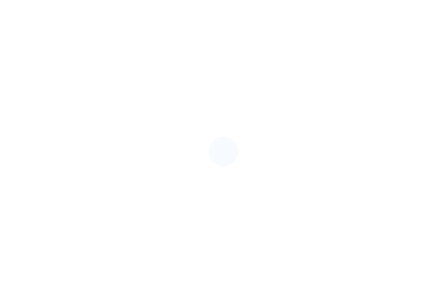

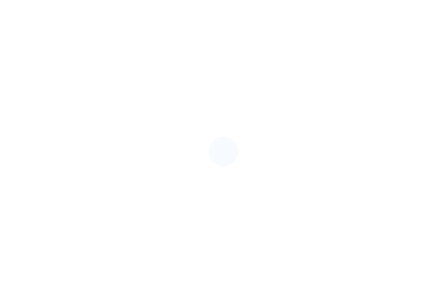

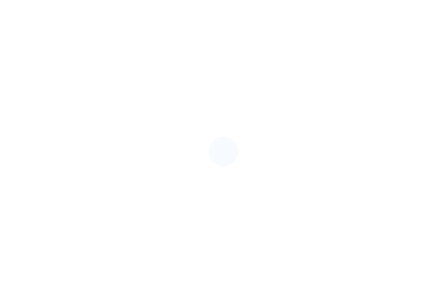

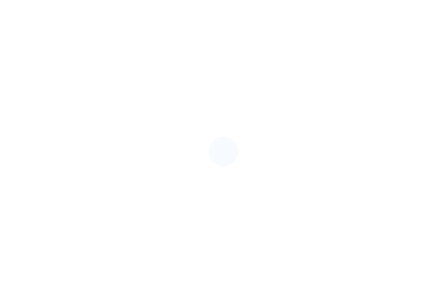

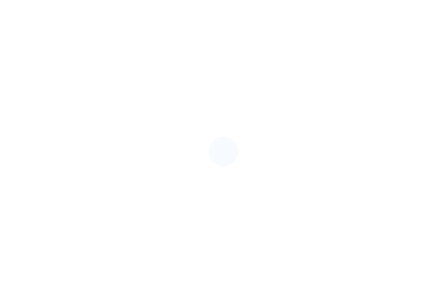

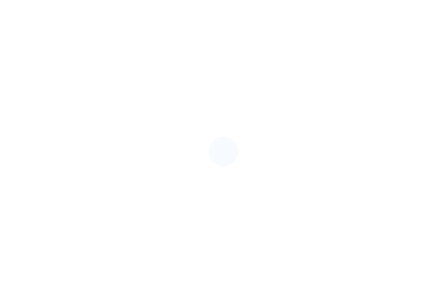

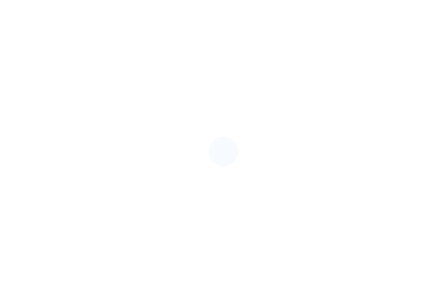

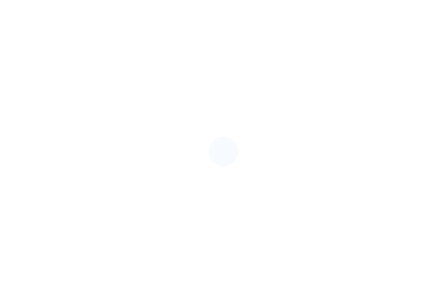

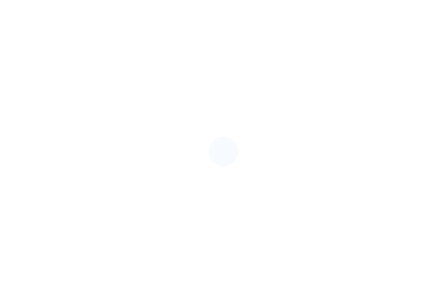

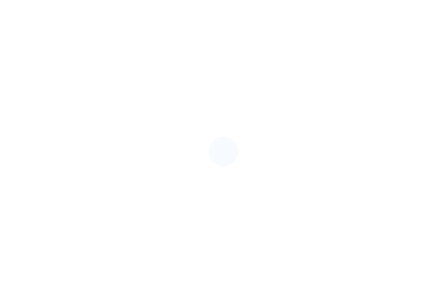

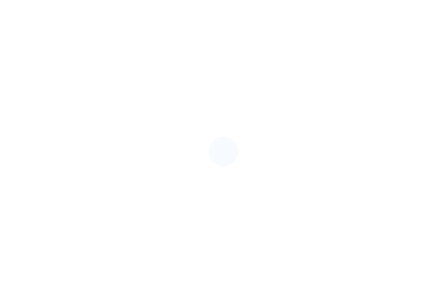

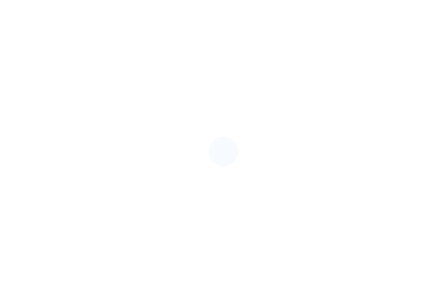

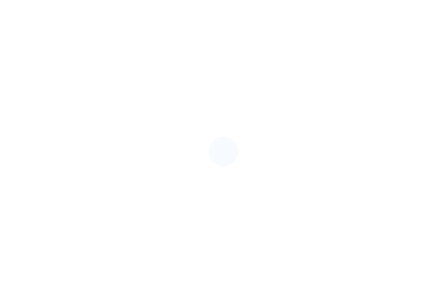

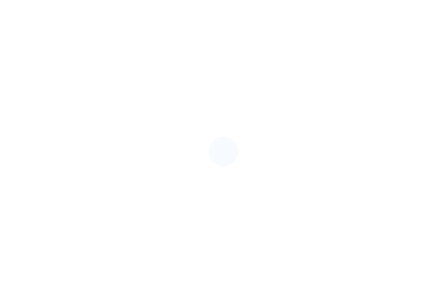

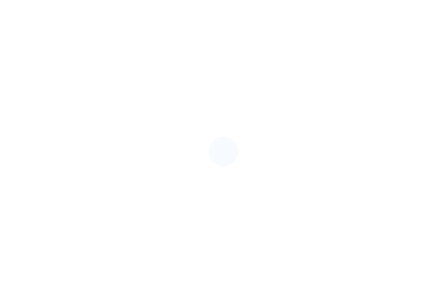

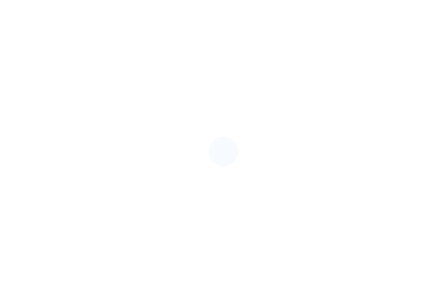

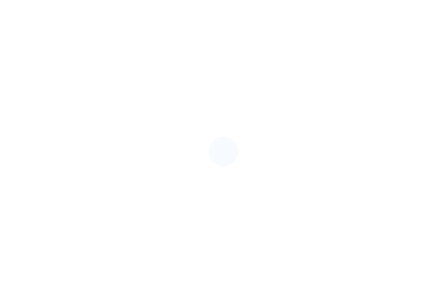

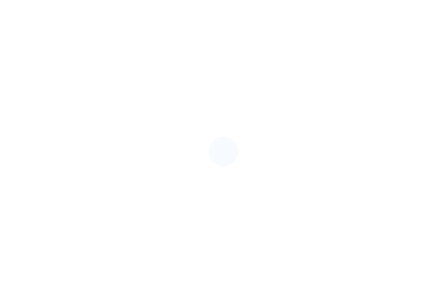

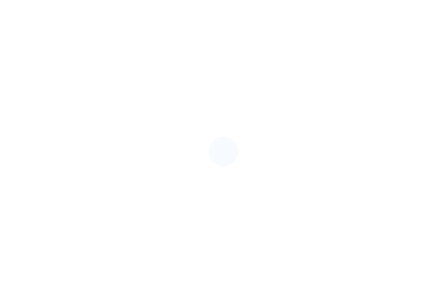

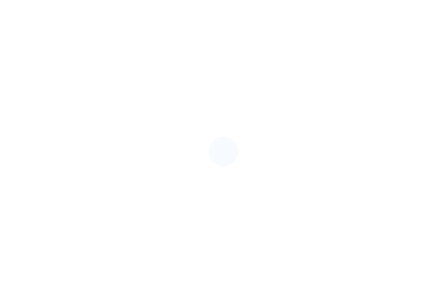

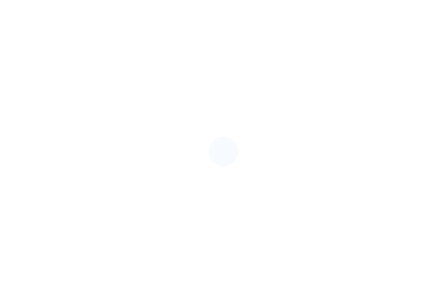

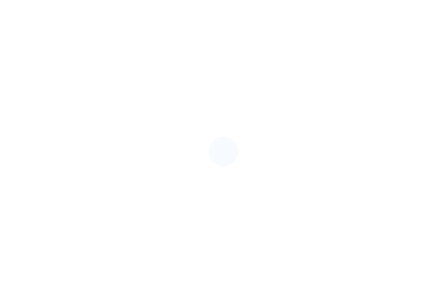

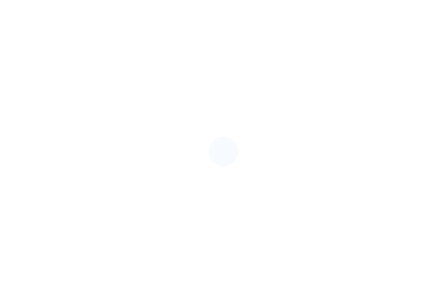

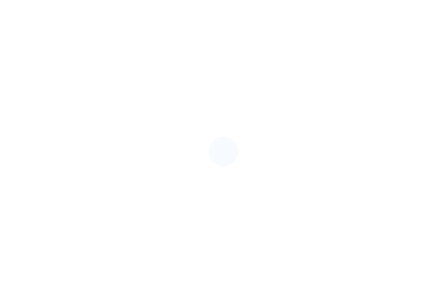

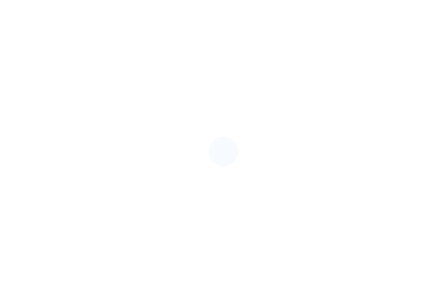

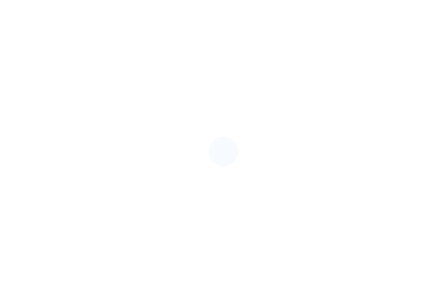

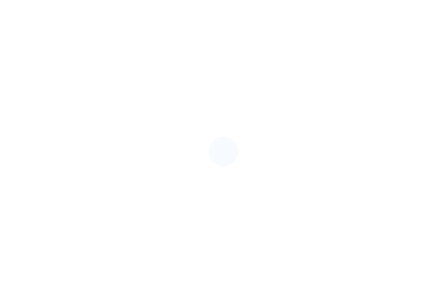

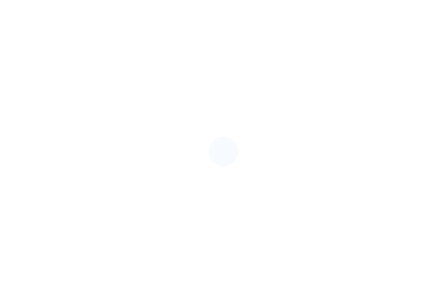

In [76]:
# Draw a graph for each strongly connected component
components = nx.connected_components(G)

for component in components:
    subgraph = G.subgraph(component)
    nx.draw(subgraph, pos, node_color=range(subgraph.number_of_nodes()), node_size=800, cmap=plt.cm.Blues)
    plt.show()

In [ ]:
# Stats before cleaning
print("Edges: ", G.number_of_edges(), ". Nodes: ", G.number_of_nodes())
print("Cleaning...")

# Threshold data and clean
edge_weights = nx.get_edge_attributes(G,'weight')
G.remove_edges_from((e for e, w in edge_weights.items() if w < 45)) # TODO: normalize threshold to max_edge?
G.remove_nodes_from(list(nx.isolates(G)))

# Stats after cleaning
print("Edges: ", G.number_of_edges(), ". Nodes: ", G.number_of_nodes())

In [ ]:
# Draw graph
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, node_color=range(G.number_of_nodes()), node_size=800, cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Draw a graph for each strongly connected component
components = nx.strongly_connected_components(G)
for component in components:
    print(component)
    subgraph = G.subgraph(component)
    nx.draw(subgraph, pos, node_color=range(subgraph.number_of_nodes()), node_size=800, cmap=plt.cm.Blues)
    plt.show()

In [ ]:
# Draw the adjacency matrix
adj_matrix = nx.to_numpy_matrix(G)
plt.imshow(adj_matrix)
plt.show()

In [ ]:
# Draw histogram of degrees
degrees = [val for (node, val) in G.degree()]
degrees.sort()
plt.hist(degrees, bins=20)